In [36]:
from database_connection import connect_to_db, close_db_connection
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
def fetch_customer_firs_order_data(conn, start_date=None, end_date=None):
    """
    Fetch customer acquisition data grouped by month.
    
    Args:
        conn: The database connection object.
    
    Returns:
        pd.DataFrame: A Pandas DataFrame with monthly acquisition data.
    """
    query = """
        SELECT
            DATE_TRUNC('week', so.created_date) AS acquisition_month,
            COUNT(DISTINCT so.counterparty_id) AS new_customers
        FROM
            fact_sales_order so
        JOIN
            dim_counterparty c
        ON
            so.counterparty_id = c.counterparty_id
        """
    # Add date filtering if start_date and end_date are provided
    if start_date and end_date:
        query += f"""
        WHERE
            so.created_date >= '{start_date}'
            AND so.created_date <= '{end_date}'
        """
    
    # Add grouping and ordering
    query += """
        GROUP BY
            DATE_TRUNC('week', so.created_date)
        ORDER BY
            acquisition_month;
    """
    cursor = conn.cursor()
    cursor.execute(query)
    columns = [desc[0] for desc in cursor.description]
    rows = cursor.fetchall()
    cursor.close()
    return pd.DataFrame(rows, columns=columns)


In [58]:
def visualize_customer_acquisition_rate(data):
    """
    Visualize the customer acquisition rate as a line chart.
    
    """
    # Convert acquisition_month to datetime for proper plotting
    data["acquisition_month"] = pd.to_datetime(data["acquisition_month"])
    
    plt.figure(figsize=(12, 6))
    plt.plot(data["acquisition_month"], data["new_customers"], marker="o", color="skyblue")
    plt.title("Customer Engagement Rate (2023)")
    plt.xlabel("Month")
    plt.ylabel("Customers")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("customer_acquisition_rate.png")
    plt.show()

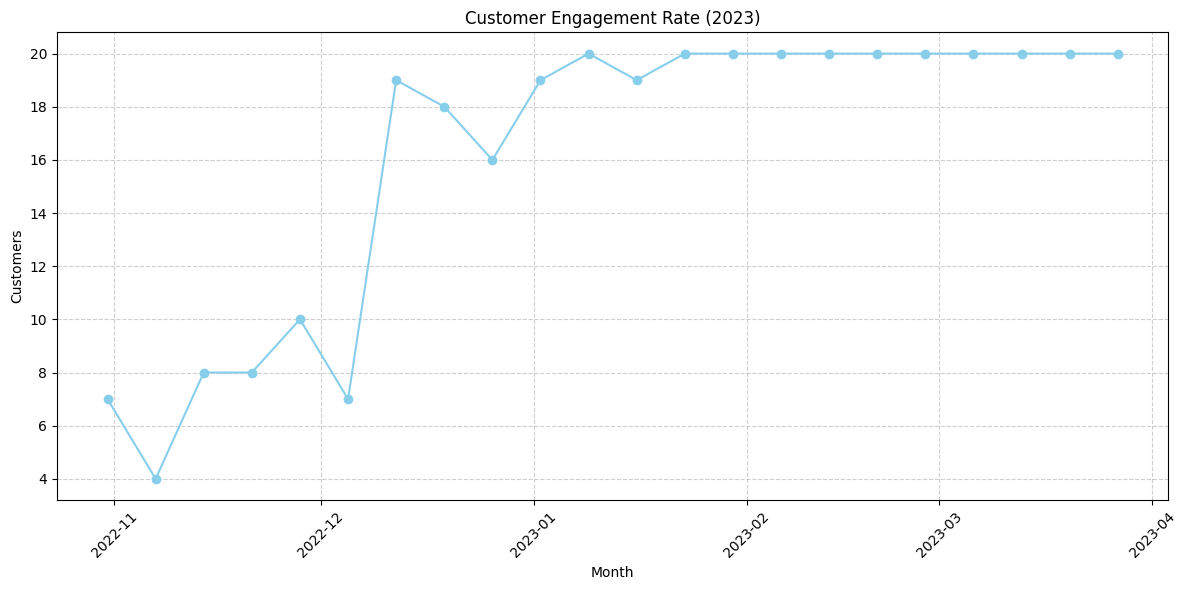

In [60]:
# Connect to the database
conn = connect_to_db()

# Fetch the data
start_date = "2022-01-01"
end_date = "2023-03-31"
acquisition_rate_data = fetch_customer_firs_order_data(conn, start_date, end_date)

# Close the connection
conn.close()

# Visualize the data
visualize_customer_acquisition_rate(acquisition_rate_data)


## The above line chart shows that in the period from 1st Jan 2022 to 31st Mar 2023, the number of customers (companies) have increased from 7 (in Nov 2022) to a steady 20 (beginning of Jan 2023). 